## Multivariate Plotting

In [4]:
import pandas as pd
import seaborn as sns
pd.set_option('max_columns', None)
df = pd.read_csv("CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
footballers.head(2)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW


A simple 'dimension' we can add to add a third dimension is hue/colour. Let's see with a scatter plot in which we're interested in which type of offensive players tend to get paid the most; the strikers, left wingers, or right wingers.

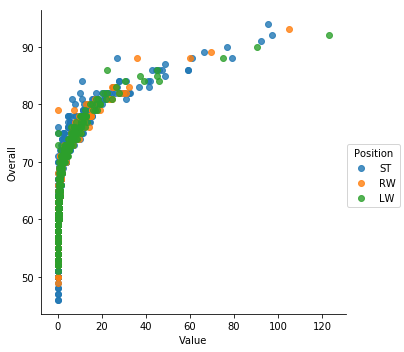

In [14]:
sns.lmplot(x='Value', y='Overall', hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

This is not particularly clear due to overplotting, however there's no obvious solution like a hexplot to solve this issue. Consider trying to alter the shape/marker parameter to make the plot more clear.

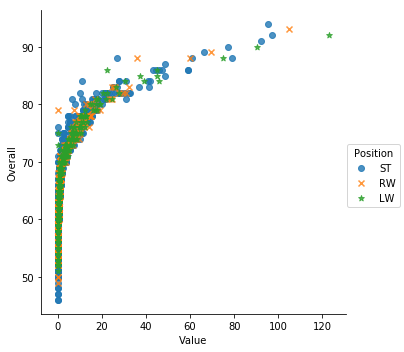

In [16]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

### Grouped Box Plot

Consider the following question: *do Strikers score higher on "Aggression" than Goalkeepers do?*  
We can investigate this with a grouped box plot, taking advantage of grouping.

In [22]:
footballers.head(1)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST


Below we subset our data to look only at overall scores between 80 and 84 (these are integers, so the values are either 80, 81, 82, 83, or 84. This creates the 5 'groups' for the boxplot.

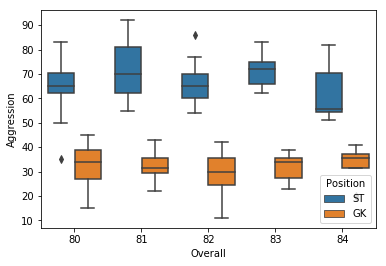

In [45]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

### Heat Maps

This particular example is a correlation plot.

You'll notice in the cell below that all values are string (even though they're numeric). Use str.isdecimal(), which checks each character in a string to make sure theyre decimal. applymap this to coerce all decimals into integer values.

In [59]:
type(footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]['Acceleration'].iloc[2])

str

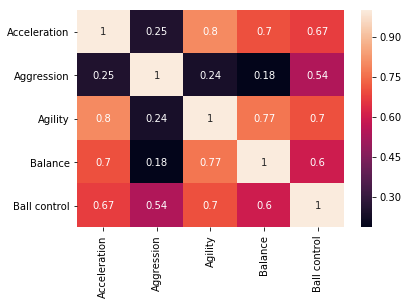

In [46]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

### Parallel Coordinates

In [51]:
from pandas.plotting import parallel_coordinates

In [60]:
f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)

In [62]:
f.head(2)

,Acceleration,Aggression,Agility,Balance,Ball control
0,89.0,63.0,89.0,63.0,93.0
3,88.0,78.0,86.0,60.0,91.0


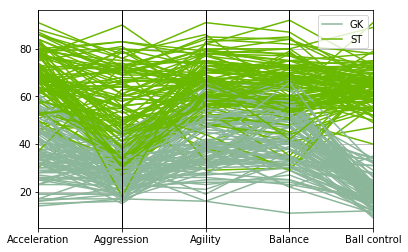

In [52]:
f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

# Questions

In [133]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head(2)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0


In [85]:
pokemon['is_legendary'] = pokemon['is_legendary'].map(lambda x: "True" if x == 1 else ("False" if x == 0 else np.nan)) 

Scatter;Attack by defense;legendary as hue/marker

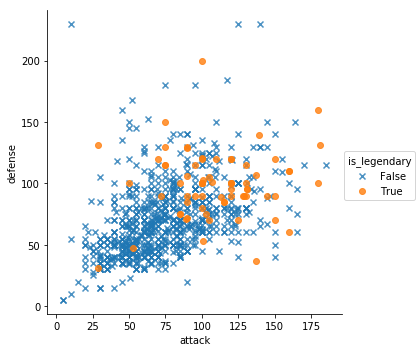

In [86]:
sns.lmplot(x='attack', y='defense', hue='is_legendary', markers=['x', 'o'],
          data=pokemon, fit_reg=False)

grouped boxplot; generation by total; legendary status in groups

In [ ]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

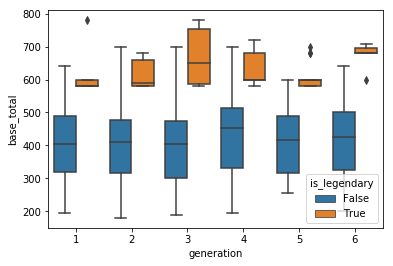

In [89]:
pokemon_ng7 = pokemon[pokemon['generation'] != 7]
sns.boxplot(x="generation", y="base_total", hue="is_legendary", data=pokemon_ng7)

correlation heatmap;hp attack sp attack defense sp def speed

In [ ]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()
sns.heatmap(f, annot=True)

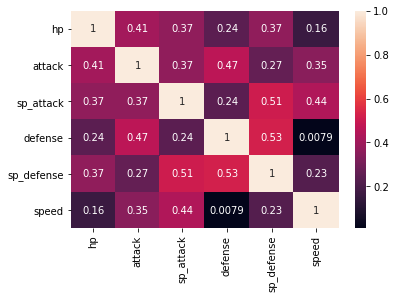

In [126]:
poke_sub = pokemon.loc[:, ['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']].dropna()
poke_sub.reset_index(inplace=True)
poke_sub.drop('abilities', axis=1)
poke_cor = poke_sub.corr()

sns.heatmap(poke_cor, annot=True)

Parellel coordinate plot; attack, sp_attack, defense, sp_defense; fighting vs psychic

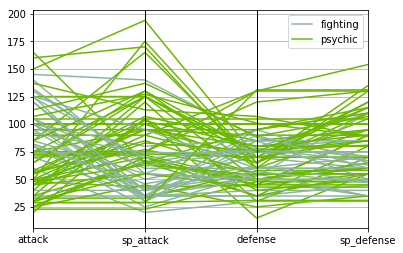

In [180]:
fight_psy = pokemon.loc[pokemon['type1'].isin(['fighting', 'psychic'])]
poke_sub = fight_psy.loc[:, ['attack', 'sp_attack', 'defense', 'sp_defense', 'type1']].dropna()
poke_sub['type1'].unique()
poke_sub.reset_index(inplace=True)
poke_sub.drop('abilities', axis=1, inplace=True)
parallel_coordinates(poke_sub, 'type1')